<a href="https://colab.research.google.com/github/Reyso/academic-projects/blob/main/ProjPDS_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Pré-processamento de sinais**

Alunos: André Santos, Carlos Henrique e Reyso Cunha

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import scipy.signal as sp
import matplotlib.pyplot as plt

caminho = '/content/DogMoveData.csv'
df = pd.read_csv(caminho)
df = df.loc[:, ~df.columns.str.contains('Back')]
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/DogMoveData.csv'

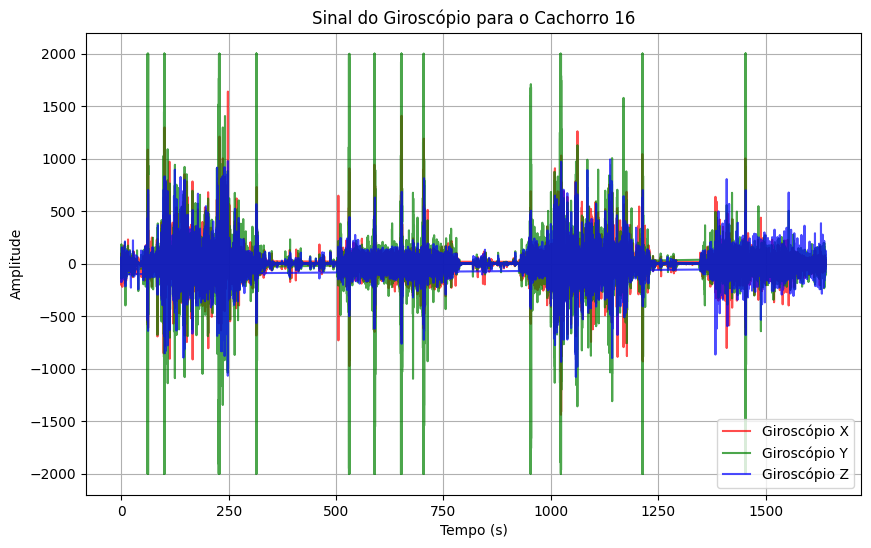

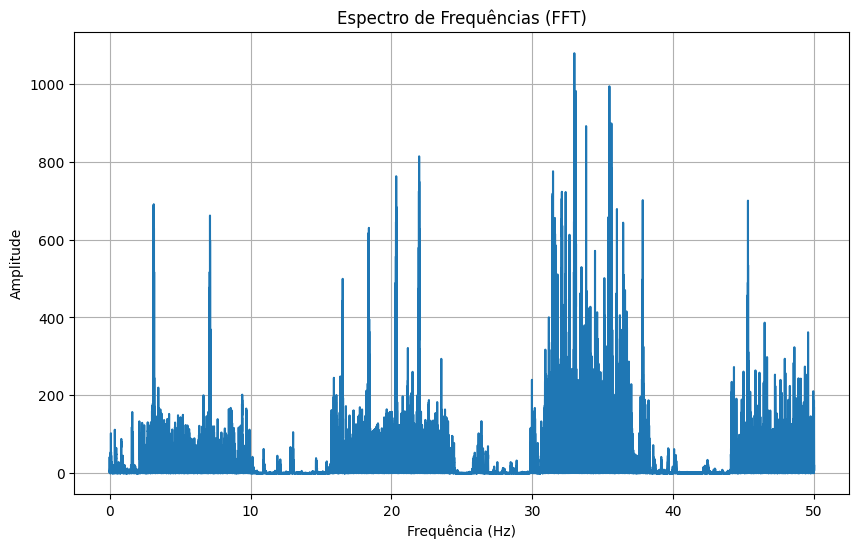

In [ ]:
# Função para plotar os dados filtrados de giroscópio
def plot_gyro_data(df, dog_id):
    # Filtrar os dados para o DogID específico
    df_dog = df[df['DogID'] == dog_id]

    # Separar as colunas do giroscópio
    gyro_x = df_dog['GNeck_x']
    gyro_y = df_dog['GNeck_y']
    gyro_z = df_dog['GNeck_z']

    acc_x = df_dog['ANeck_x']
    acc_y = df_dog['ANeck_y']
    acc_z = df_dog['ANeck_z']

    time = df_dog['t_sec']  # Usar o tempo para o eixo x

    # Criar uma figura e eixos para plotar os dados
    plt.figure(figsize=(10, 6))

    # Plotar cada eixo do giroscópio
    plt.plot(time, gyro_x, label='Giroscópio X', color='r', alpha=0.7)
    plt.plot(time, gyro_y, label='Giroscópio Y', color='g', alpha=0.7)
    plt.plot(time, gyro_z, label='Giroscópio Z', color='b', alpha=0.7)

    # Configurações do gráfico
    plt.title(f'Sinal do Giroscópio para o Cachorro {dog_id}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return gyro_z.values

# Exemplo: plotar os dados de giroscópio para um DogID específico
dog_id_especifico = 16  # Mudar para o DogID que você quer analisar
sinal = plot_gyro_data(df, dog_id_especifico)

ft = fft(sinal)
n = len(sinal)  # Número de pontos de dados
timestep = 0.01  # Intervalo de tempo entre amostras (modifique conforme os seus dados)
frequencias = fftfreq(n, d=timestep)

# 6. Plotar o espectro de frequências (FFT)
plt.figure(figsize=(10, 6))
plt.plot(frequencias[:n // 2], np.abs(sinal)[:n // 2])  # Metade positiva do espectro
plt.title("Espectro de Frequências (FFT)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

##Normalização

In [ ]:
# Função para calcular as normas
def calcular_normas(group):
    # Calcular a norma euclidiana do acelerômetro no pescoço
    group['acc_norm'] = np.sqrt(group['ANeck_x']**2 + group['ANeck_y']**2 + group['ANeck_z']**2)

    # Calcular a norma euclidiana do giroscópio no pescoço
    group['gyro_norm'] = np.sqrt(group['GNeck_x']**2 + group['GNeck_y']**2 + group['GNeck_z']**2)


    return group

# Aplicar a função para cada grupo de DogID
df_normas = df.groupby('DogID').apply(calcular_normas)
# Exibir os resultados
for dog_id in df['DogID'].unique():
    print(f'Resultados para o cachorro com DogID {dog_id}:')
    print(df_normas[df_normas['DogID'] == dog_id][['acc_norm', 'gyro_norm']].head())
    print('\n')

<ipython-input-47-b68ff1af494d>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_normas = df.groupby('DogID').apply(calcular_normas)


Resultados para o cachorro com DogID 16:
         acc_norm  gyro_norm
DogID                       
16    0  1.066952  16.839069
      1  1.046192  17.554480
      2  1.042208  26.869962
      3  1.013382  38.524066
      4  0.950969  41.955358


Resultados para o cachorro com DogID 18:
               acc_norm    gyro_norm
DogID                               
18    320876   7.563891  1858.904759
      320877   8.982480  2053.059731
      320878  10.230862  2032.203019
      320879  10.030777  2006.484651
      320880  10.582251  1778.198042


Resultados para o cachorro com DogID 19:
              acc_norm   gyro_norm
DogID                             
19    496212  0.918241   73.774342
      496213  0.987293   79.709162
      496214  1.033661   84.662191
      496215  1.055531   91.570662
      496216  1.101081  101.006108


Resultados para o cachorro com DogID 20:
              acc_norm  gyro_norm
DogID                            
20    653588  0.997440  42.660826
      653589  0.96982

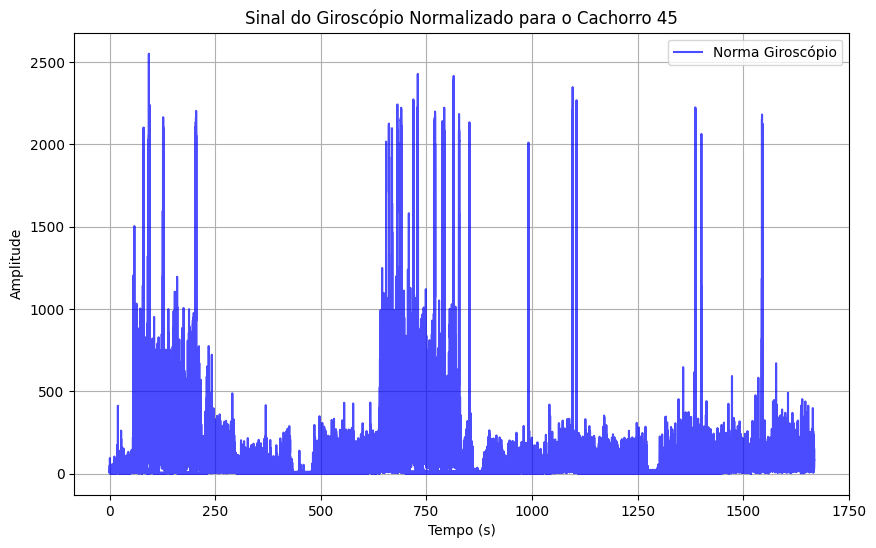

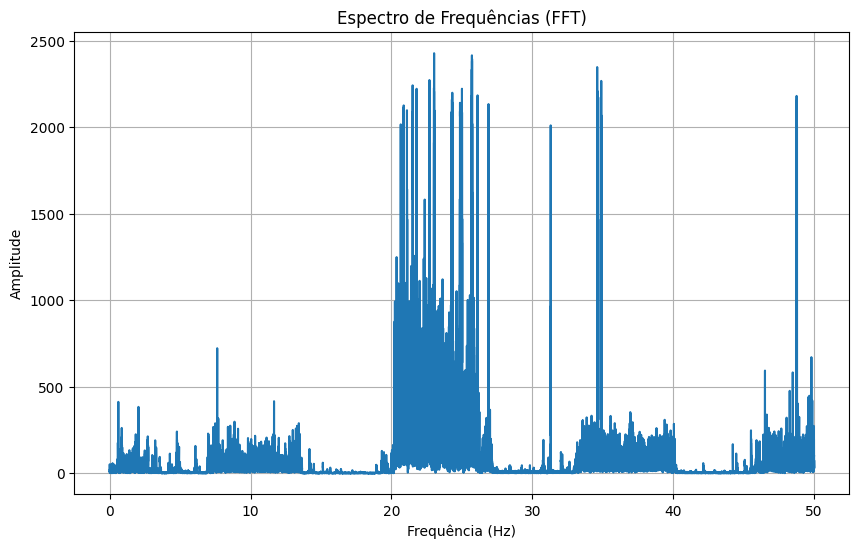

In [ ]:
# Função para plotar as normas calculadas (por exemplo, 'gyro_neck_norm')
def plot_norma_data(df, dog_id):
    # Filtrar os dados para o DogID específico
    df_dog = df[df['DogID'] == dog_id]

    # Separar a norma do giroscópio no pescoço
    gyro = df_dog['gyro_norm']
    time = df_dog['t_sec']  # Usar o tempo (ou índice) para o eixo X

    # Criar uma figura e eixos para plotar os dados
    plt.figure(figsize=(10, 6))

    # Plotar a norma do giroscópio no pescoço
    plt.plot(time, gyro, label='Norma Giroscópio', color='b', alpha=0.7)

    # Configurações do gráfico
    plt.title(f'Sinal do Giroscópio Normalizado para o Cachorro {dog_id}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return gyro.values

# Exemplo: Plotar as normas para um DogID específico
dog_id = 45  # Mudar para o DogID que você quer analisar
sinal = plot_norma_data(df_normas, dog_id)

ft = fft(sinal)
n = len(sinal)  # Número de pontos de dados
timestep = 0.01  # Intervalo de tempo entre amostras (modifique conforme os seus dados)
frequencias = fftfreq(n, d=timestep)

# 6. Plotar o espectro de frequências (FFT)
plt.figure(figsize=(10, 6))
plt.plot(frequencias[:n // 2], np.abs(sinal)[:n // 2])  # Metade positiva do espectro
plt.title("Espectro de Frequências (FFT)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

##Filtros

Ordem do filtro:  3




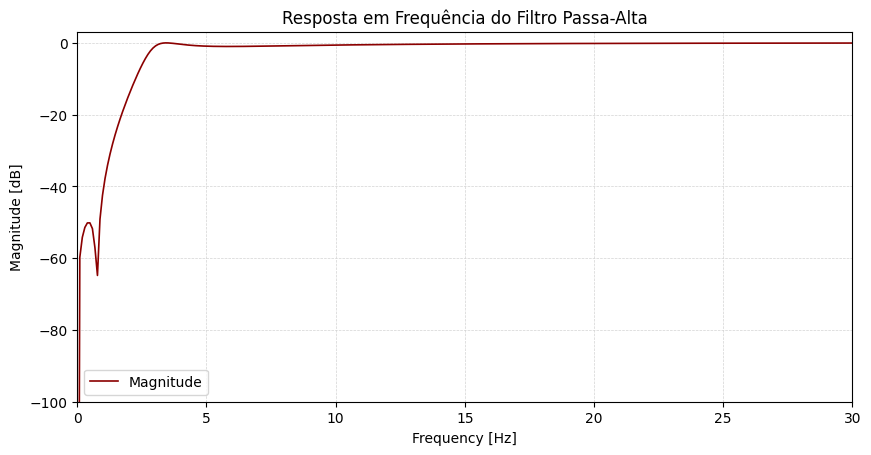

In [ ]:
gp = 1     # passband gain (dB)
gs = 50   # stopband gain (actually, minimum attenuation, in dB)

fss = 100      # sampling frequency (Hz)
fp2 = 3       # passband frequency  (Hz)
fs2 = 0.5    # stopband frequency (Hz)

fn = fss/2    # Nyquist frequency


filtype = 'ellip'  # qual aproximation
b_1, a_1 = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b_1, a_1, None, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

print('Ordem do filtro: ', len(a_1)-1)
print('\n')

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Resposta em Frequência do Filtro Passa-Alta')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,30, -100,3])
## Gera legenda
plt.legend()
plt.show()

Ordem do filtro:  8




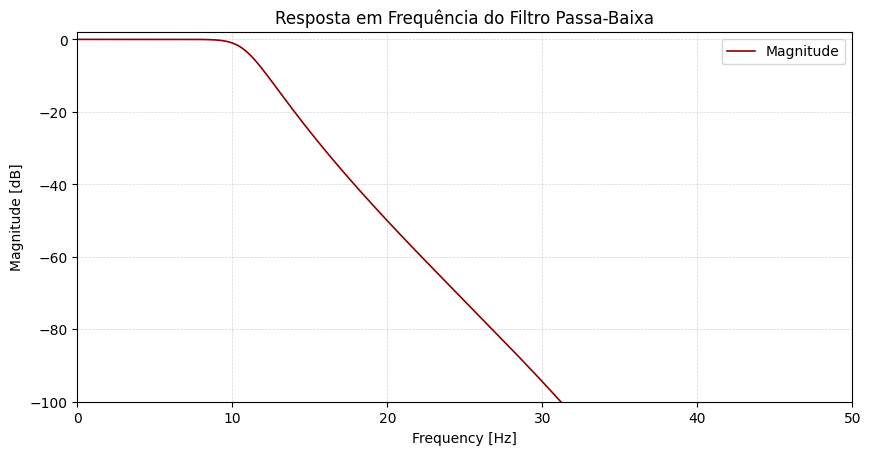

In [ ]:
gp = 1     # passband gain (dB)
gs = 50    # stopband gain (actually, minimum attenuation, in dB)

fss = 100      # sampling frequency (Hz)
fp2 = 10   # passband frequency  (Hz)
fs2 = 20    # stopband frequency (Hz)

fn = fss/2    # Nyquist frequency


filtype = 'butter'  # qual aproximation
b_2, a_2 = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b_2, a_2, None, fs = fss)
h_mag = 20 * np.log10(abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

print('Ordem do filtro: ', len(a_2)-1)
print('\n')

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Resposta em Frequência do Filtro Passa-Baixa')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,50, -100,2])
## Gera legenda
plt.legend()
plt.show()

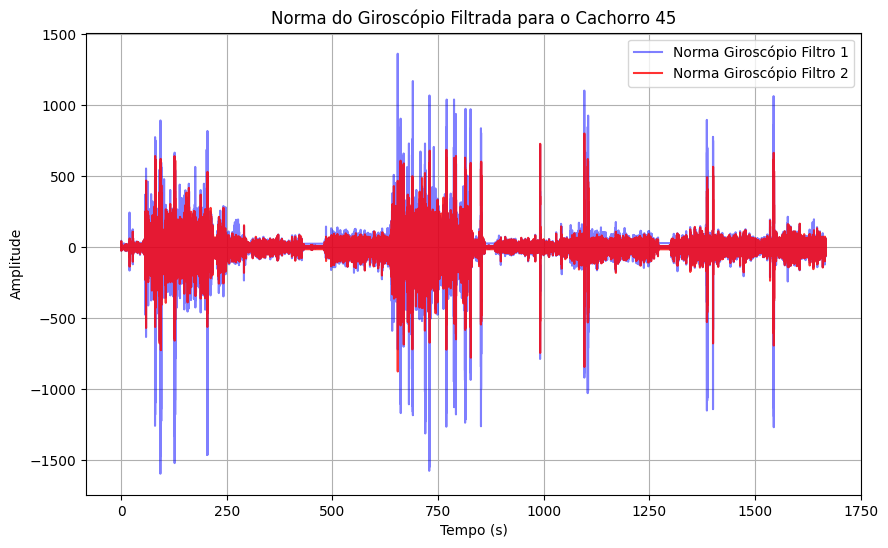

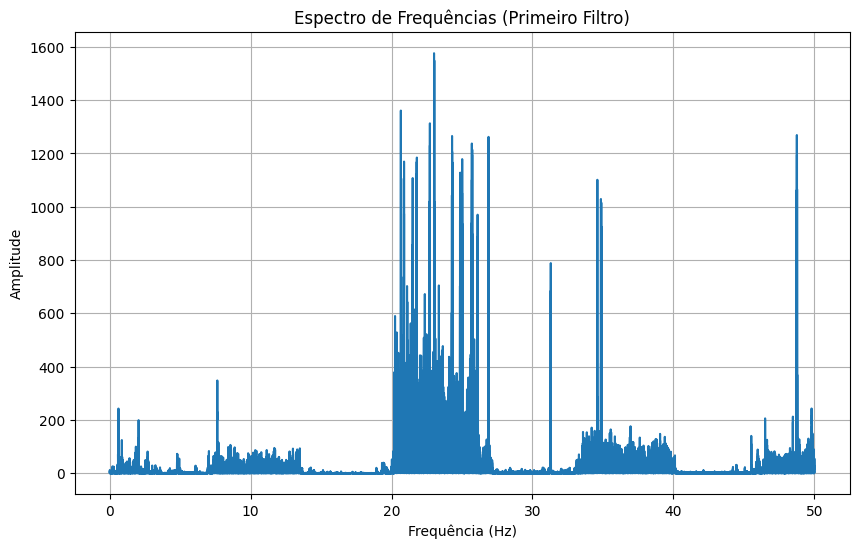

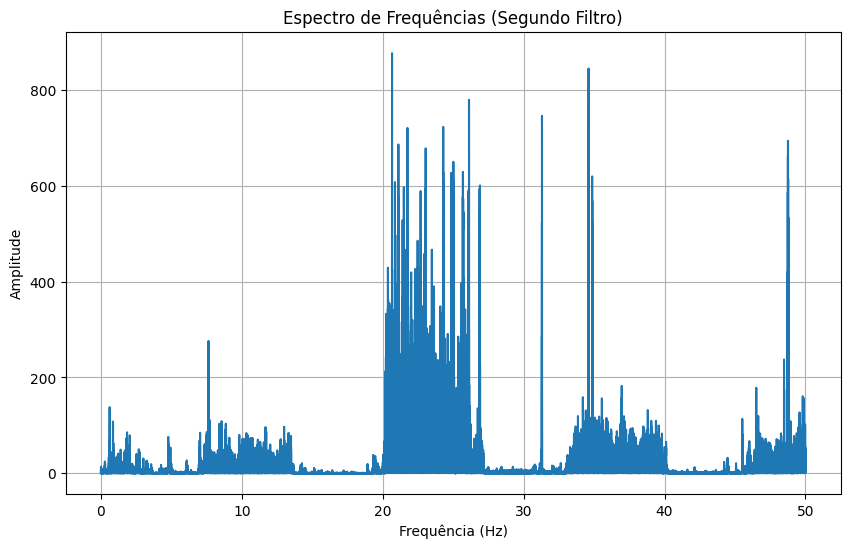

In [ ]:
def plot_norma_data_filtrada(df, dog_id, b_1, a_1, b_2, a_2):
    # Filtrar os dados para o DogID específico
    df_dog = df[df['DogID'] == dog_id]

    # Separar a norma do giroscópio no pescoço
    gyro_norm = df_dog['gyro_norm'].values  # Remover possíveis NaNs

    # Aplicar o filtro no sinal normalizado
    gyro_filtrado_alta = sp.lfilter(b_1, a_1, gyro_norm)
    gyro_filtrado_baixa = sp.lfilter(b_2, a_2, gyro_filtrado_alta)

    # Eixo X: tempo
    time = df_dog['t_sec'].values  # Usar o tempo ou índice para o eixo X

    # Criar uma figura e eixos para plotar os dados
    plt.figure(figsize=(10, 6))

    # Plotar a norma original e a norma filtrada do giroscópio no pescoço
    plt.plot(time, gyro_filtrado_alta, label='Norma Giroscópio Filtro 1', color='b', alpha=0.5)
    plt.plot(time, gyro_filtrado_baixa, label='Norma Giroscópio Filtro 2', color='r', alpha=0.8)

    # Configurações do gráfico
    plt.title(f'Norma do Giroscópio Filtrada para o Cachorro {dog_id}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return gyro_filtrado_alta, gyro_filtrado_baixa

dog_id = 45  # Mudar para o DogID que você quer analisar
# Exemplo: Plotar as normas filtradas para um DogID específico
sinal_alta, sinal_baixa = plot_norma_data_filtrada(df_normas, dog_id, b_1, a_1, b_2, a_2)

ft = fft(sinal_alta)
n = len(sinal_alta)  # Número de pontos de dados
timestep = 0.01  # Intervalo de tempo entre amostras
frequencias = fftfreq(n, d=timestep)

# 6. Plotar o espectro de frequências (FFT)
plt.figure(figsize=(10, 6))
plt.plot(frequencias[:n // 2], np.abs(sinal_alta)[:n // 2])  # Metade positiva do espectro
plt.title("Espectro de Frequências (Primeiro Filtro)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

ft = fft(sinal_baixa)
n = len(sinal_baixa)  # Número de pontos de dados
frequencias = fftfreq(n, d=timestep)

# 6. Plotar o espectro de frequências (FFT)
plt.figure(figsize=(10, 6))
plt.plot(frequencias[:n // 2], np.abs(sinal_baixa)[:n // 2])  # Metade positiva do espectro
plt.title("Espectro de Frequências (Segundo Filtro)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

##Janelamento

In [ ]:
def sliding_window(signal, window_size:int, step_size:int):
    """
    Implementa uma janela de observação deslizante ao longo de um sinal.

    Parameters:
    ----------
    signal: np.array- ou list-like
        Sinal de entrada; pode ser uma lista ou um array numpy.

    window_size: int
        Tamanho da janela de observação, dado em elementos do sinal de entrada.

    step_size: int
        Valor do deslocamento da janela de observada, em elementos do sinal de
        entrada.

    Returns:
    --------
    Um gerador Python que retorna uma seção do sinal de entrada a cada iteração.

    """
    for i in range(0, len(signal) - window_size + 1, step_size):
        yield signal[i:i+window_size]

# Definição do gerador w_gen
w_gen = sliding_window(signal, w_length, stp_size)


w_list = []
# Exemplo de utilização
for sig_w in w_gen: # iteração sobre o gerador definido
    w_list.append(sig_w) #save each window

